In [ ]:
# import all necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


**DATA IMPORT**

In [ ]:
#read the dataset
df=pd.read_csv("/content/digit_svm.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(42000, 785)

**DATA UNDERSTANDING AND EXPLORATION**

In [ ]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB



All the columns are of dtype - int64.

In [ ]:
#checking for null values
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


There are no null values

**COLUMN-label**

In [ ]:
#To check the unique entries of label column
np.unique(df["label"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


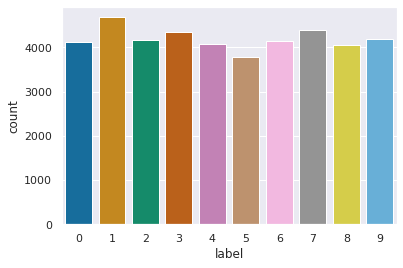

In [ ]:
#visualising the column-label
sns.countplot(df["label"],palette="colorblind")

**VISUALIZE NUMBERS**

Text(0.5, 1.0, 'Digit-9')

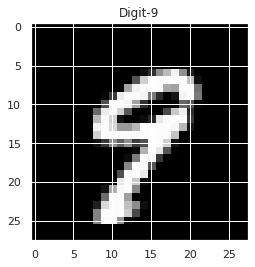

In [ ]:
nine=df.iloc[11,1:]
nine=nine.values.reshape(28,28)
plt.imshow(nine,cmap="gray")
plt.title("Digit-9")

Text(0.5, 1.0, 'Digit-4')

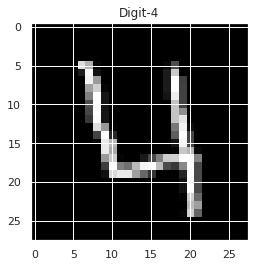

In [ ]:
four=df.iloc[3,1:]
four=four.values.reshape(28,28)
plt.imshow(four,cmap="gray")
plt.title("Digit-4")

Text(0.5, 1.0, 'Digit-8')

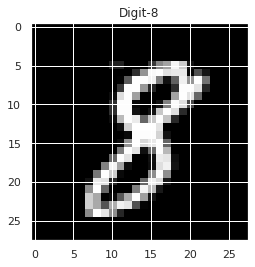

In [ ]:
eight=df.iloc[20,1:]
eight=eight.values.reshape(28,28)
plt.imshow(eight,cmap="gray")
plt.title("Digit-8")

**DATA PREPARATION FOR MODEL BUILDING**

In [ ]:
# average feature values
round(df.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). Nevertheless, it is better to rescale them.

In [ ]:
# separating into X and Y variables
X = df.iloc[:, 1:] # iloc ensures X will be a dataframe
Y = df.iloc[:, 0]

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.2, random_state = 101)

In [ ]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**MODEL BUILDING**

1.Let us first try-LINEAR MODEL

In [ ]:
# linear model
from sklearn.svm import SVC

#model
model_linear = SVC(kernel='linear',random_state=0)

#fit
model_linear.fit(X_train, Y_train)

# predict
y_pred = model_linear.predict(X_test)

**CLASSIFICATION METRICS**

Evaluation:

In [ ]:
#Accuracy score and confusion matrix
accuracy_score(Y_test,y_pred)

0.9189285714285714

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[767,   0,   0,   2,   1,   8,   7,   0,   4,   0],
       [  0, 931,   4,   1,   2,   0,   1,   1,   7,   1],
       [  6,  15, 774,  19,   7,   7,  12,   6,  12,   1],
       [  4,   7,  27, 770,   4,  25,   0,   3,  11,   8],
       [  4,   3,   2,   1, 774,   3,   5,   3,   2,  21],
       [ 11,   3,   6,  44,   7, 626,  15,   2,  15,   4],
       [  1,   3,   6,   1,  11,  10, 790,   0,   2,   0],
       [  1,   0,  11,   8,  16,   1,   0, 816,   0,  20],
       [  9,  12,  14,  29,   6,  22,   6,   5, 707,  10],
       [  9,   3,   7,   8,  41,   2,   0,  37,   6, 764]])

The linear model gives approx. 92% accuracy. Let's look at a non-linear model.

Let us try Non- linear models:

1.rbf kernel

In [ ]:
from sklearn.svm import SVC

#model
model_linear = SVC(kernel='rbf',random_state=0)

#fit
model_linear.fit(X_train, Y_train)

#predict
y_pred = model_linear.predict(X_test)

EVALUATION

In [ ]:
#Accuracy score and confusion matrix
accuracy_score(Y_test,y_pred)

0.9608333333333333

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[775,   0,   4,   1,   0,   2,   2,   1,   4,   0],
       [  0, 931,   6,   1,   3,   0,   2,   1,   3,   1],
       [  4,   3, 830,   5,   7,   1,   2,   3,   3,   1],
       [  1,   4,  14, 814,   0,   5,   0,   6,  10,   5],
       [  1,   1,   8,   0, 790,   0,   4,   5,   2,   7],
       [  2,   1,   8,   7,   1, 702,   8,   0,   3,   1],
       [  2,   2,  10,   0,   2,   5, 803,   0,   0,   0],
       [  2,   0,  11,   3,  12,   0,   0, 834,   0,  11],
       [  0,   4,   9,   3,   6,   7,   3,   3, 782,   3],
       [  3,   2,  13,   6,  15,   1,   0,  22,   5, 810]])


As we clearly see that the non-linear rbf model gives approx.96% accuracy.